# Student Academic Outcome Prediction

This notebook implements supervised learning techniques to predict student academic outcomes (Graduate, Dropout, or Enrolled) based on various student attributes. We'll explore the data, preprocess it, build different models, evaluate their performance, and interpret the results.

## 1. Import Required Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_palette('deep')
%matplotlib inline

## 2. Data Loading and Exploration

Let's load the student dataset and explore its structure to understand the data we're working with.


First 5 rows of the train dataset:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate



 Types of the columns:


id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u


Missing values:


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


Basic statistics:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000



Target Train variable distribution:


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target
Graduate    47.42
Dropout     33.06
Enrolled    19.52
Name: count, dtype: float64

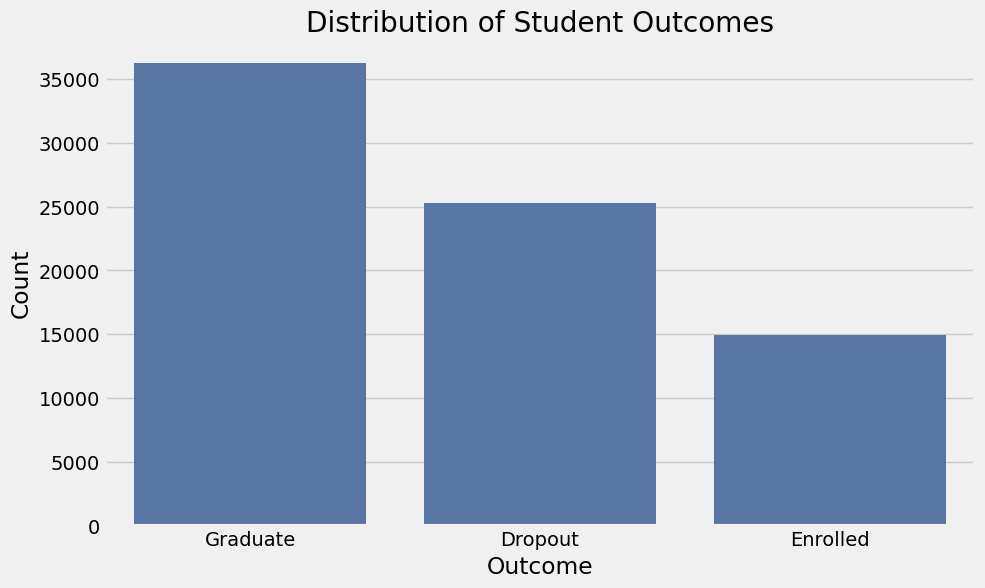

In [12]:
data_train = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

print("\nFirst 5 rows of the train dataset:")
display(data_train.head())

print("\n Types of the columns:")
display(data_train.dtypes)

print("\nMissing values:")
display(data_train.isnull().sum())

print("\nBasic statistics:")
display(data_train.describe())

print("\nTarget Train variable distribution:")
target_counts = data_train['Target'].value_counts()
display(target_counts)
target_percentage = round(100 * target_counts / len(data_train), 2)
display(target_percentage)

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=data_train)
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Data Preprocessing

In this section, we'll handle missing values, encode categorical variables, and scale numerical features to prepare the data for modeling.

Making enrolled count as dropout

Original Target Distribution:


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target
Graduate    47.42
Dropout     33.06
Enrolled    19.52
Name: proportion, dtype: float64


New Binary Target Distribution:


Target_Binary
Graduate        51222
Not_Graduate    25296
Name: count, dtype: int64

Target_Binary
Graduate        66.94
Not_Graduate    33.06
Name: proportion, dtype: float64

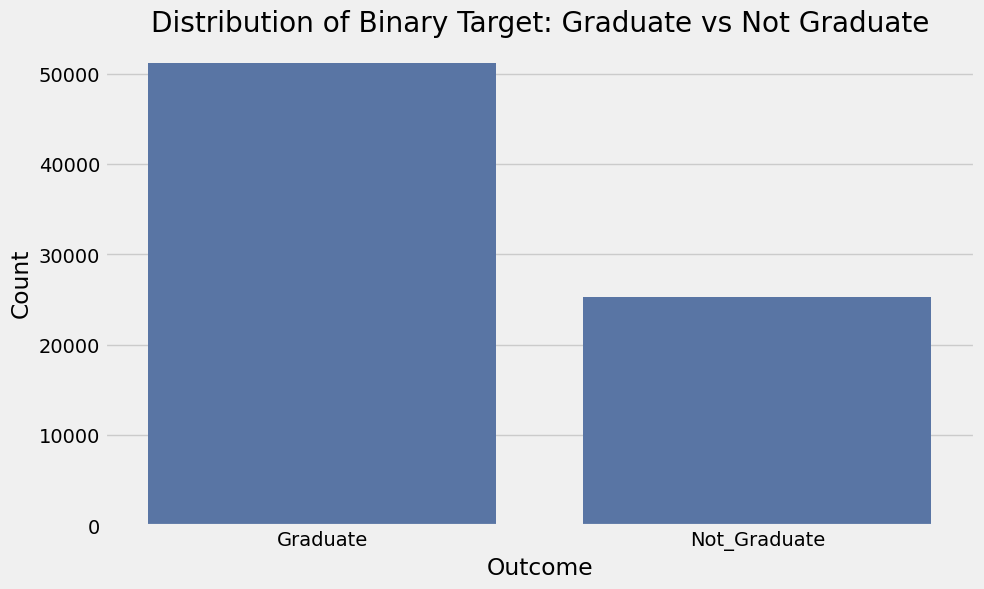

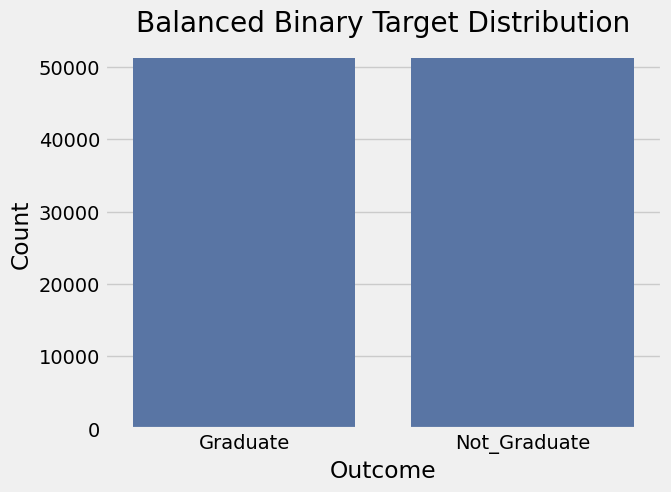

Balanced Distribution:


Target_Binary
Graduate        51222
Not_Graduate    51222
Name: count, dtype: int64


Feature selection will now be applied to this binary classification problem.


In [13]:
from imblearn.over_sampling import RandomOverSampler

print("Original Target Distribution:") 
display(data_train['Target'].value_counts()) 
display(data_train['Target'].value_counts(normalize=True).round(4) * 100)

data_train['Target_Binary'] = data_train['Target'].map({'Graduate': 'Graduate', 'Dropout': 'Not_Graduate', 'Enrolled': 'Graduate'})

print("\nNew Binary Target Distribution:") 
display(data_train['Target_Binary'].value_counts()) 
display(data_train['Target_Binary'].value_counts(normalize=True).round(4) * 100)

plt.figure(figsize=(10, 6)) 
sns.countplot(x='Target_Binary', data=data_train)
plt.title('Distribution of Binary Target: Graduate vs Not Graduate') 
plt.xlabel('Outcome') 
plt.ylabel('Count') 
plt.xticks(rotation=0) 
plt.show()

X_train = data_train.drop(['Target', 'Target_Binary', 'id'], axis=1)
y_train_binary = data_train['Target_Binary']

rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train_binary)

sns.countplot(x=y_resampled)
plt.title('Balanced Binary Target Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

print("Balanced Distribution:")
display(pd.Series(y_resampled).value_counts())

print("\nFeature selection will now be applied to this binary classification problem.")

## 4. Model Building

Let's build multiple classification models to predict student outcomes.


--- Logistic Regression ---
Accuracy: 88.97 %
Precision: 89.18 %
Recall: 88.97 %
F1 Score: 88.96 %
Training time: 0.4828 seconds
Testing time: 0.0026 seconds
Accuracy: 88.97 %
Precision: 89.18 %
Recall: 88.97 %
F1 Score: 88.96 %
Training time: 0.4828 seconds
Testing time: 0.0026 seconds
Classification Report:
               precision    recall  f1-score   support

    Graduate       0.86      0.93      0.89     10245
Not_Graduate       0.92      0.85      0.89     10244

    accuracy                           0.89     20489
   macro avg       0.89      0.89      0.89     20489
weighted avg       0.89      0.89      0.89     20489

Confusion Matrix:
 [[9485  760]
 [1499 8745]]

--- Decision Tree ---
Classification Report:
               precision    recall  f1-score   support

    Graduate       0.86      0.93      0.89     10245
Not_Graduate       0.92      0.85      0.89     10244

    accuracy                           0.89     20489
   macro avg       0.89      0.89      0.89     2

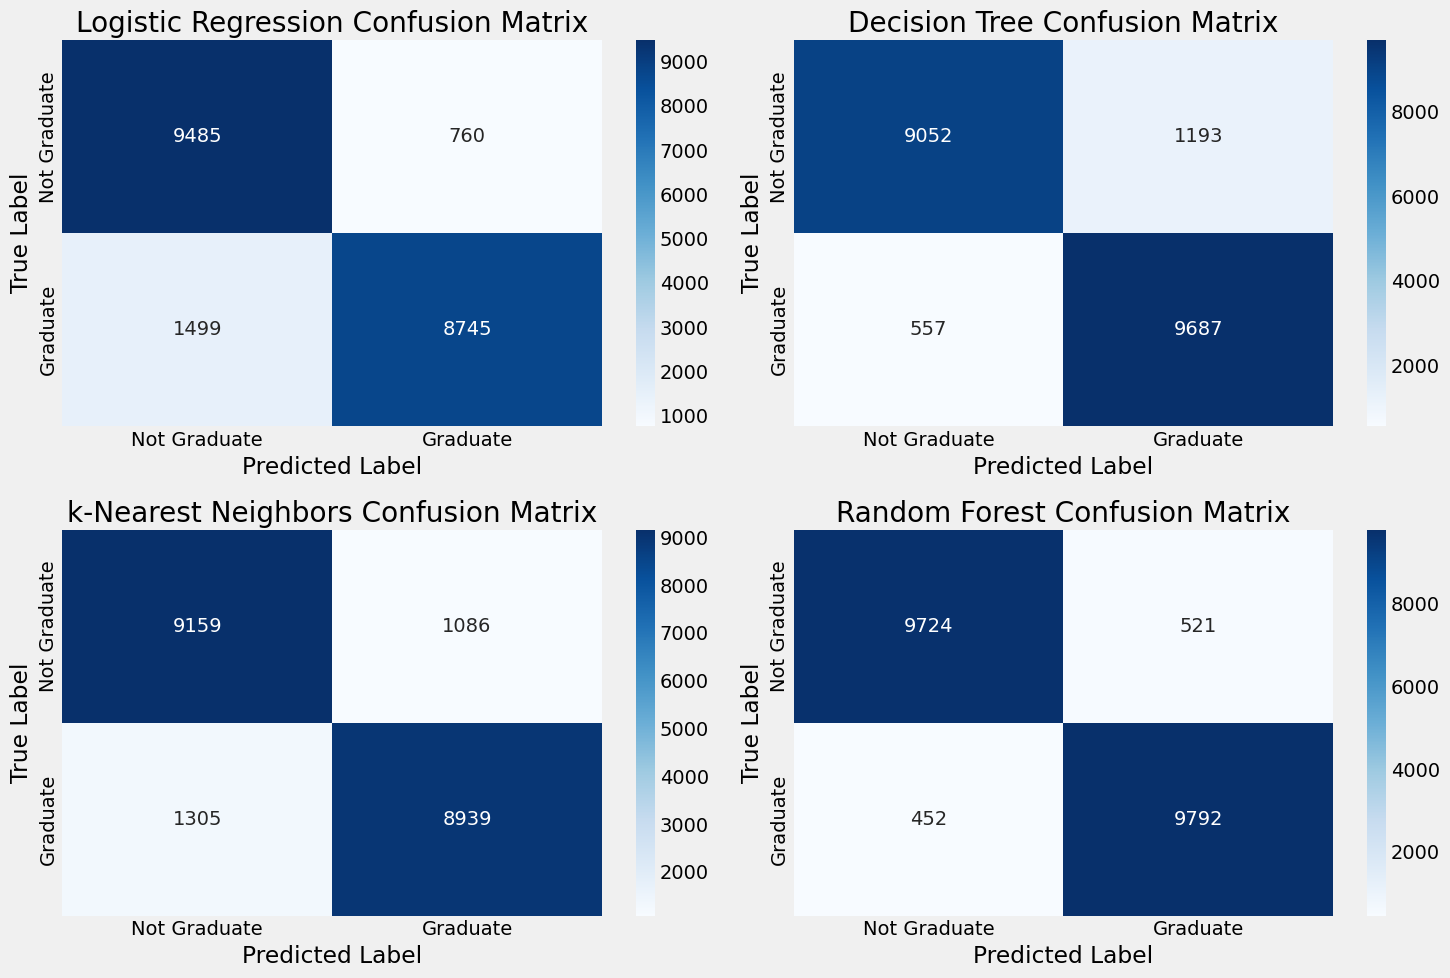

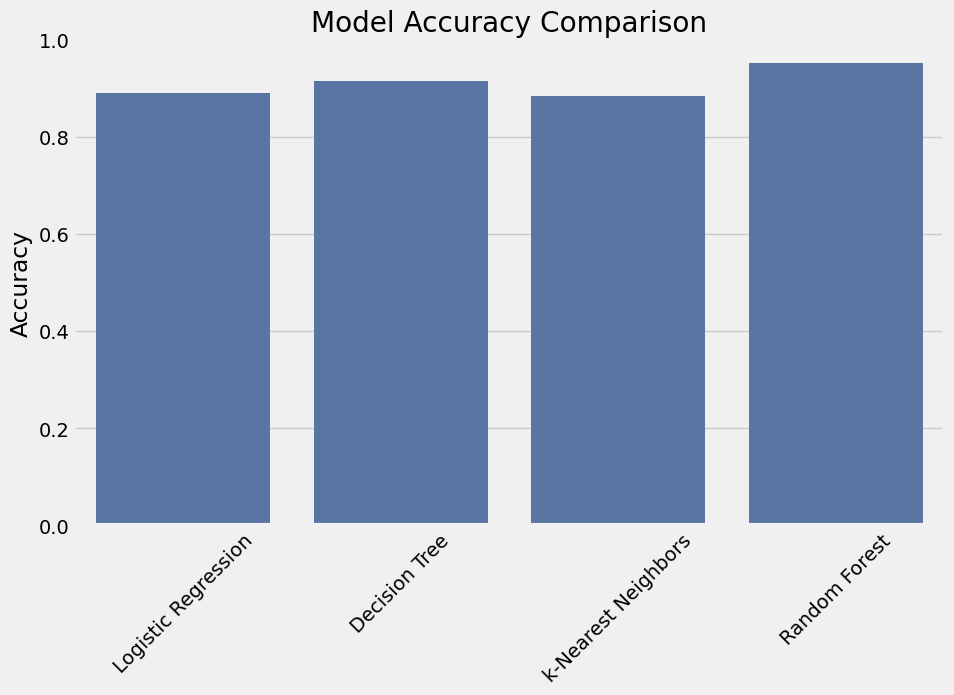

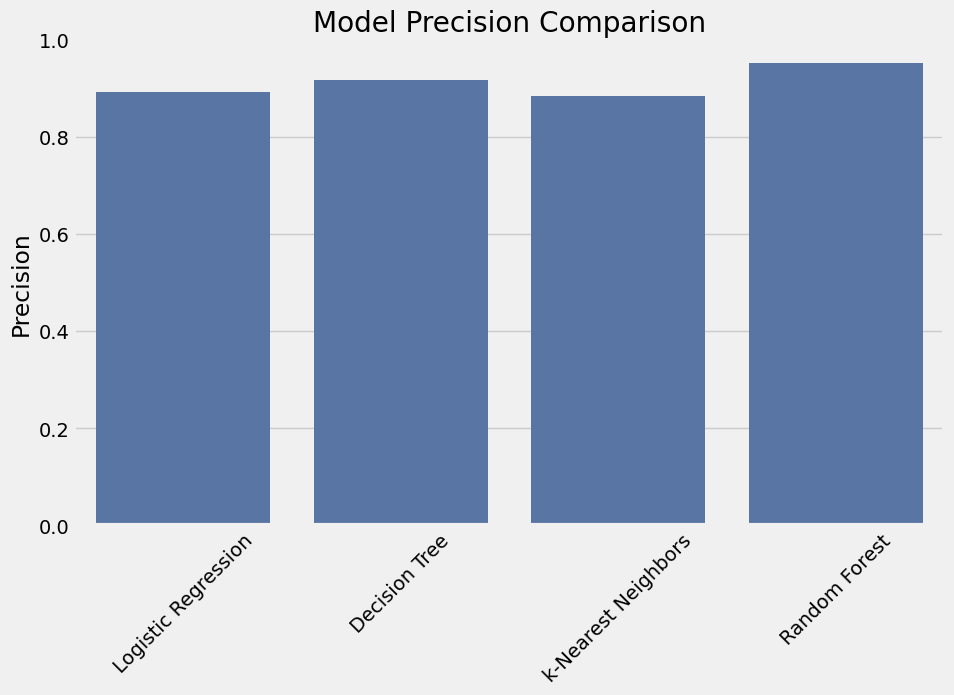

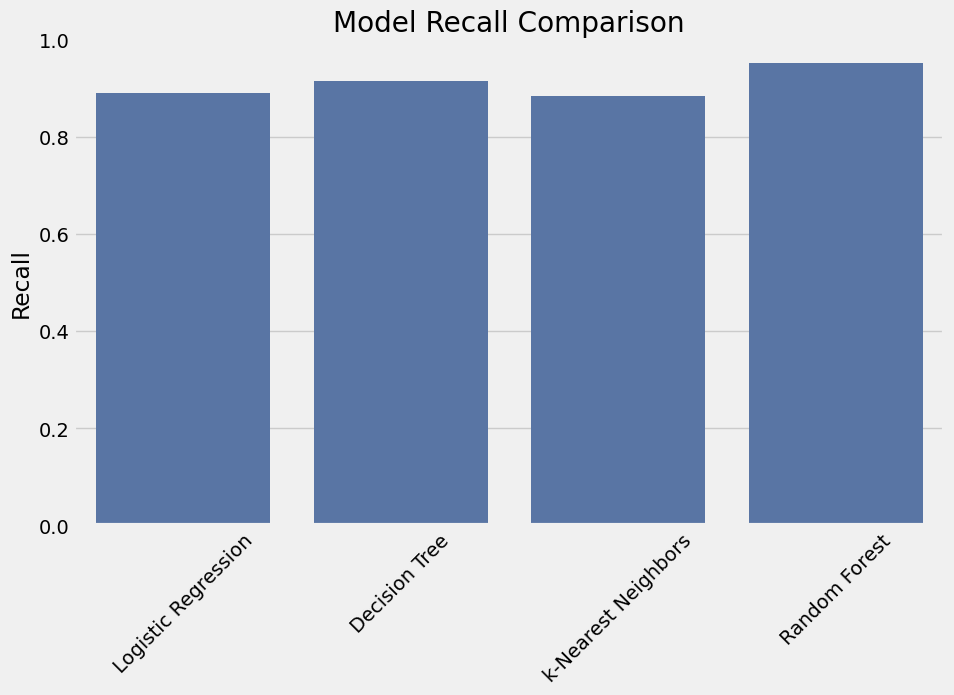

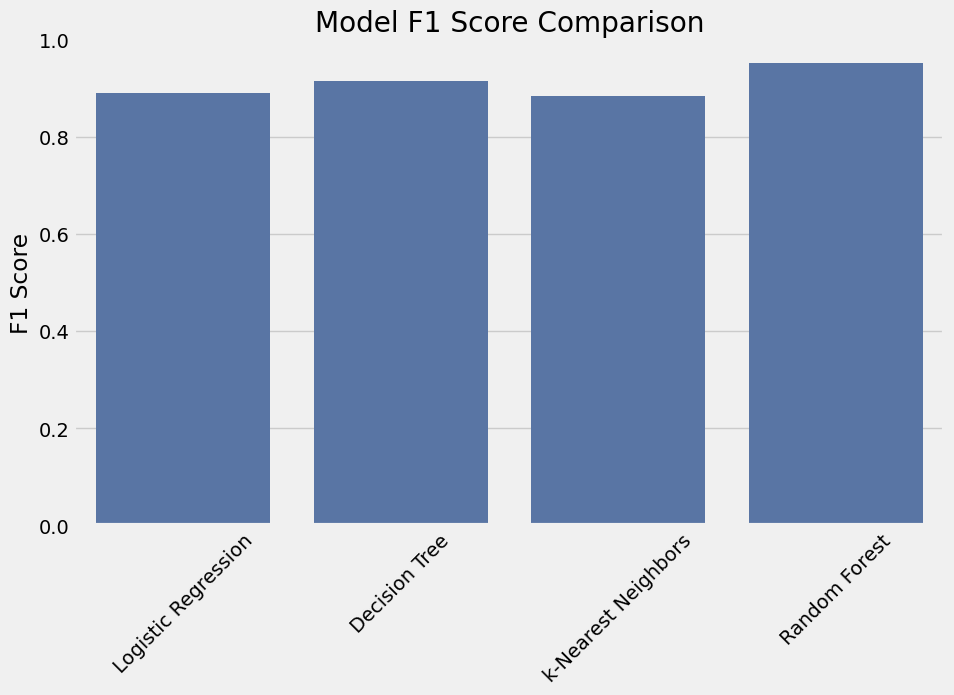

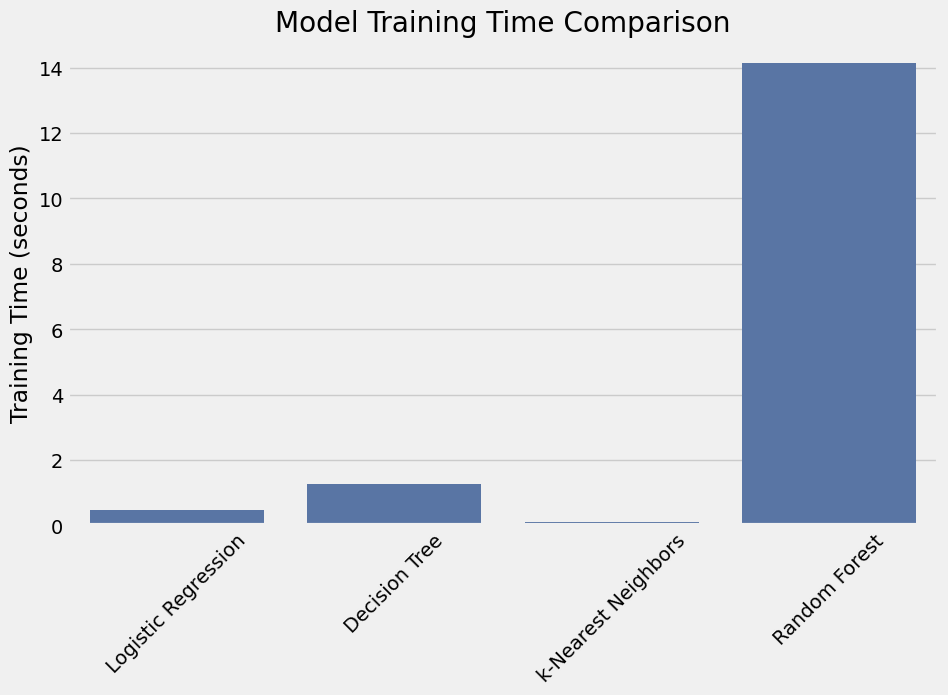

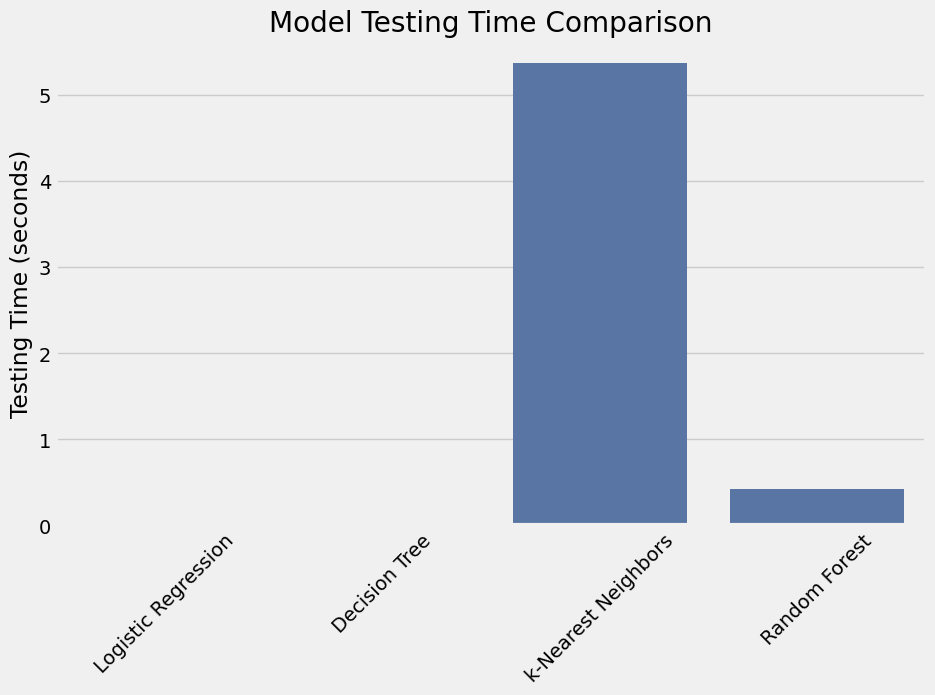

,Model,Accuracy,Precision,Recall,F1 Score,Training Time (s),Testing Time (s)
3,Random Forest,95.25,95.25,95.25,95.25,14.1528,0.4219
1,Decision Tree,91.46,91.62,91.46,91.45,1.2591,0.0069
0,Logistic Regression,88.97,89.18,88.97,88.96,0.4828,0.0026
2,k-Nearest Neighbors,88.33,88.35,88.33,88.33,0.1009,5.3719


In [14]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    #"Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
training_times = {}
testing_times = {}
all_cms = {}

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n--- {name} ---")
    
    # Measure training time
    start_train = time.time()
    model.fit(X_train_scaled, y_train_final)
    train_time = time.time() - start_train
    training_times[name] = train_time
    
    # Measure testing time
    start_test = time.time()
    y_pred = model.predict(X_test_scaled)
    test_time = time.time() - start_test
    testing_times[name] = test_time
    
    # Calculate metrics
    acc = accuracy_score(y_test_final, y_pred)
    prec = precision_score(y_test_final, y_pred, average='weighted')
    rec = recall_score(y_test_final, y_pred, average='weighted')
    f1 = f1_score(y_test_final, y_pred, average='weighted')
    cm = confusion_matrix(y_test_final, y_pred)
    
    # Store metrics
    results[name] = acc
    precision_scores[name] = prec
    recall_scores[name] = rec
    f1_scores[name] = f1
    all_cms[name] = cm
    
    # Print results
    print("Accuracy:", round(acc * 100, 2), "%")
    print("Precision:", round(prec * 100, 2), "%")
    print("Recall:", round(rec * 100, 2), "%") 
    print("F1 Score:", round(f1 * 100, 2), "%")
    print("Training time: {:.4f} seconds".format(train_time))
    print("Testing time: {:.4f} seconds".format(test_time))
    print("Classification Report:\n", classification_report(y_test_final, y_pred))
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Graduate', 'Graduate'],
                yticklabels=['Not Graduate', 'Graduate'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot precision comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()))
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot recall comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()))
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot F1 comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot training times
plt.figure(figsize=(10, 6))
sns.barplot(x=list(training_times.keys()), y=list(training_times.values()))
plt.title("Model Training Time Comparison")
plt.ylabel("Training Time (seconds)")
plt.xticks(rotation=45)
plt.show()

# Plot testing times
plt.figure(figsize=(10, 6))
sns.barplot(x=list(testing_times.keys()), y=list(testing_times.values()))
plt.title("Model Testing Time Comparison")
plt.ylabel("Testing Time (seconds)")
plt.xticks(rotation=45)
plt.show()

# Create a comprehensive summary table of results
summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [round(acc * 100, 2) for acc in results.values()],
    'Precision': [round(prec * 100, 2) for prec in precision_scores.values()],
    'Recall': [round(rec * 100, 2) for rec in recall_scores.values()],
    'F1 Score': [round(f1 * 100, 2) for f1 in f1_scores.values()],
    'Training Time (s)': [round(time, 4) for time in training_times.values()],
    'Testing Time (s)': [round(time, 4) for time in testing_times.values()]
})
display(summary_df.sort_values('Accuracy', ascending=False))

## 5. Hyperparameter Tuning

Let's optimize our models using GridSearchCV to find the best hyperparameters.

### 5.1 Random Forest Hyperparameter Tuning


--- Hyperparameter Tuning for Random Forest ---
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9460
Time taken: 1937.17 seconds
Test accuracy with tuned Random Forest: 0.9514
Test precision with tuned Random Forest: 0.9515
Test recall with tuned Random Forest: 0.9514
Test F1 score with tuned Random Forest: 0.9514
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.96      0.95      0.95     10245
Not_Graduate       0.95      0.96      0.95     10244

    accuracy                           0.95     20489
   macro avg       0.95      0.95      0.95     20489
weighted avg       0.95      0.95      0.95     20489



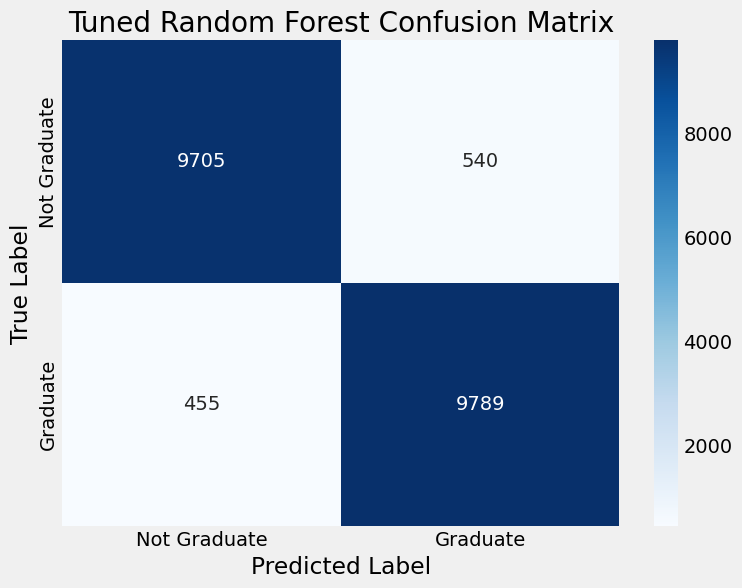

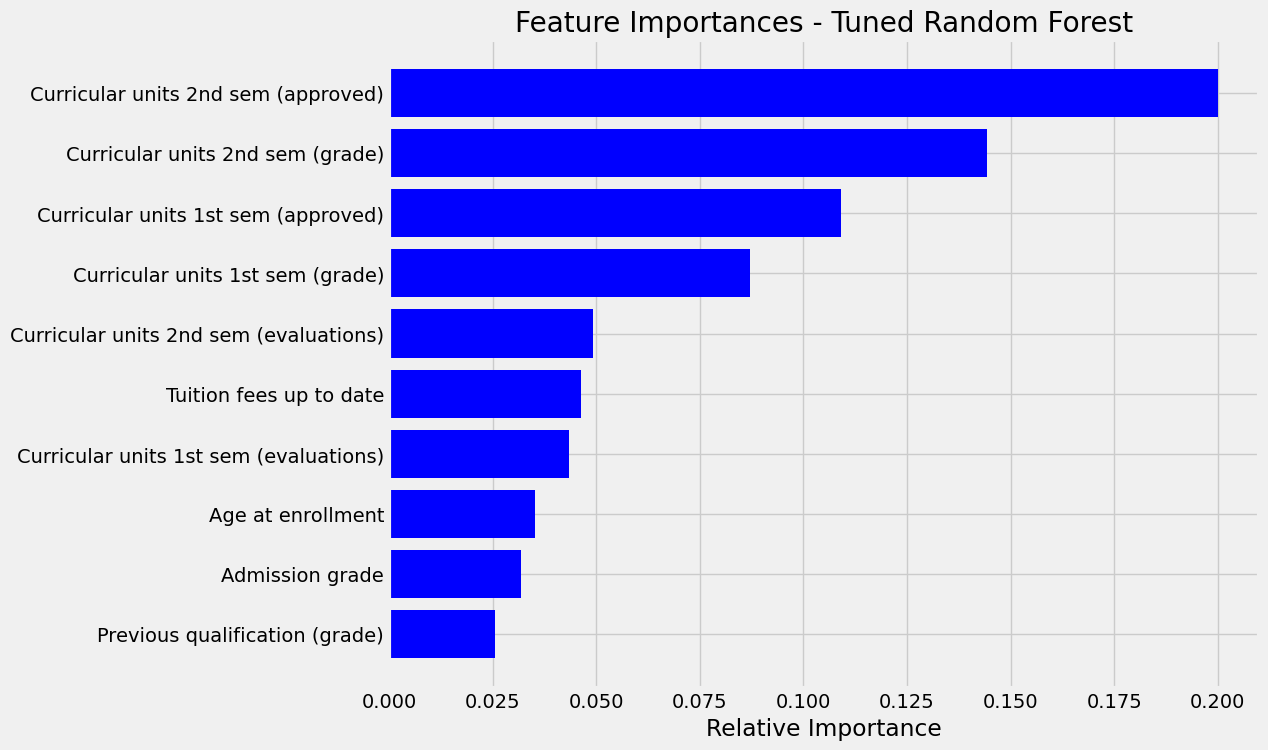

In [5]:
# Hyperparameter tuning for Random Forest
print("\n--- Hyperparameter Tuning for Random Forest ---")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Measure training time
start_time = time.time()
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train_final)
tuning_time_rf = time.time() - start_time

print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation score: {grid_rf.best_score_:.4f}")
print(f"Time taken: {tuning_time_rf:.2f} seconds")

# Use the best model for prediction
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test_final, y_pred_rf)
prec_rf = precision_score(y_test_final, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test_final, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_final, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test_final, y_pred_rf)

print(f"Test accuracy with tuned Random Forest: {acc_rf:.4f}")
print(f"Test precision with tuned Random Forest: {prec_rf:.4f}")
print(f"Test recall with tuned Random Forest: {rec_rf:.4f}")
print(f"Test F1 score with tuned Random Forest: {f1_rf:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_rf)}")

# Plot confusion matrix for tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot feature importance
feature_importances = best_rf.feature_importances_
features = X_train_final.columns
indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances - Tuned Random Forest')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 5.2 k-Nearest Neighbors Hyperparameter Tuning


--- Hyperparameter Tuning for k-Nearest Neighbors ---
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score: 0.9334
Time taken: 567.96 seconds
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score: 0.9334
Time taken: 567.96 seconds
Test accuracy with tuned KNN: 0.9382
Test precision with tuned KNN: 0.9386
Test recall with tuned KNN: 0.9382
Test F1 score with tuned KNN: 0.9382
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.95      0.92      0.94     10245
Not_Graduate       0.93      0.95      0.94     10244

    accuracy                           0.94     20489
   macro avg       0.94      0.94      0.94     20489
weighted avg       0.94      0.94      0.94     20489

Test accuracy with tuned KNN: 0.9382
Test precision with tuned KNN: 0.9386
Test recall with tuned KNN: 0.9382
Test F1 score with tuned KNN: 0.9382
Classific

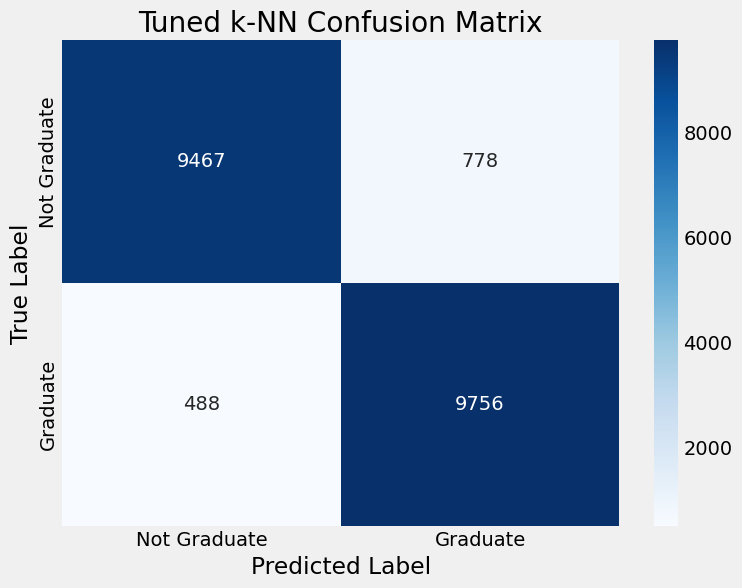

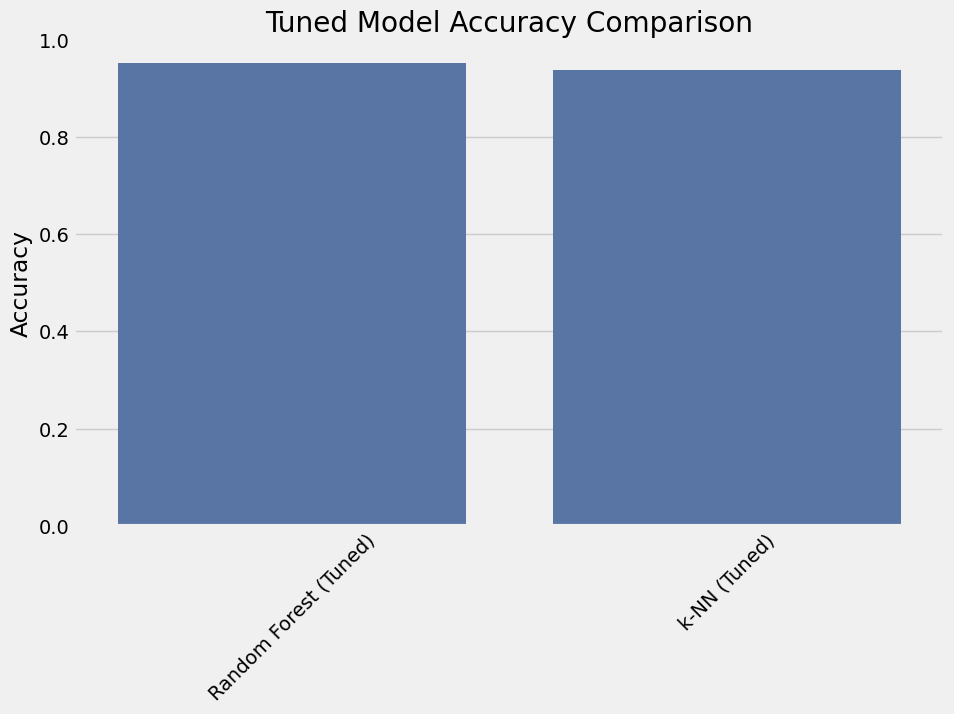

In [17]:
# Hyperparameter tuning for KNN
print("\n--- Hyperparameter Tuning for k-Nearest Neighbors ---")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Measure training time
start_time = time.time()
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train_final)
tuning_time_knn = time.time() - start_time

print(f"Best parameters: {grid_knn.best_params_}")
print(f"Best cross-validation score: {grid_knn.best_score_:.4f}")
print(f"Time taken: {tuning_time_knn:.2f} seconds")

# Use the best model for prediction
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test_final, y_pred_knn)
prec_knn = precision_score(y_test_final, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test_final, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_final, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test_final, y_pred_knn)

print(f"Test accuracy with tuned KNN: {acc_knn:.4f}")
print(f"Test precision with tuned KNN: {prec_knn:.4f}")
print(f"Test recall with tuned KNN: {rec_knn:.4f}")
print(f"Test F1 score with tuned KNN: {f1_knn:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_knn)}")

# Plot confusion matrix for tuned KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned k-NN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 5.3 Decision Tree Hyperparameter Tuning


--- Hyperparameter Tuning for Decision Tree ---
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9049
Time taken: 151.50 seconds
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9049
Time taken: 151.50 seconds
Test accuracy with tuned Decision Tree: 0.9119
Test precision with tuned Decision Tree: 0.9122
Test recall with tuned Decision Tree: 0.9119
Test F1 score with tuned Decision Tree: 0.9118
Test accuracy with tuned Decision Tree: 0.9119
Test precision with tuned Decision Tree: 0.9122
Test recall with tuned Decision Tree: 0.9119
Test F1 score with tuned Decision Tree: 0.9118
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.92      0.90      0.91     10245
Not_Graduate       0.90      0.93      0.91     10244

    accuracy                           0.91     20489
   macro avg       0.91      0.91      0.91   

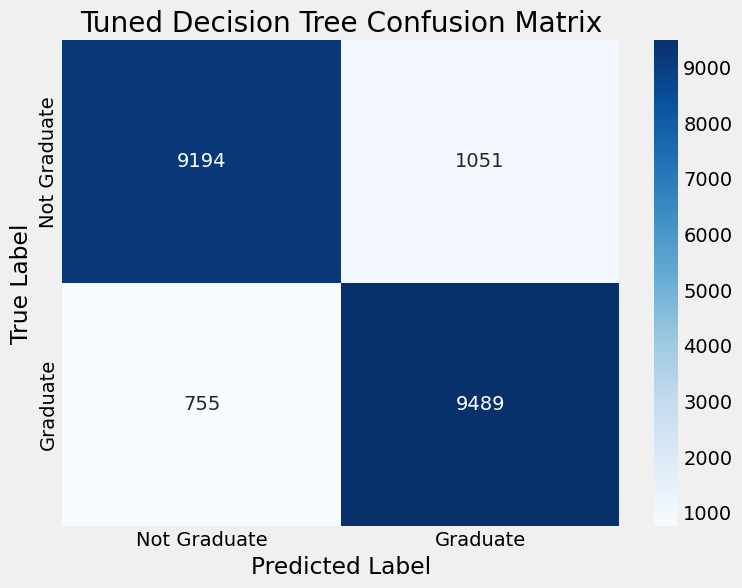

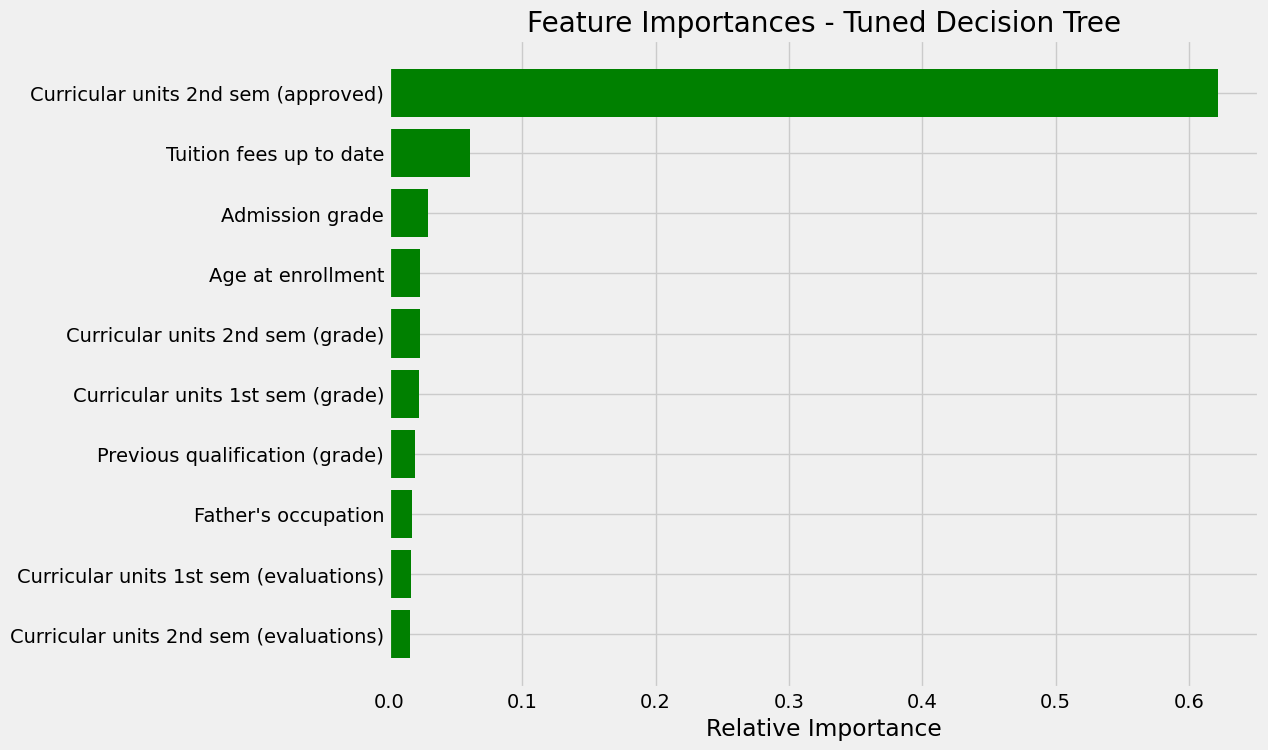

In [15]:
print("\n--- Hyperparameter Tuning for Decision Tree ---")
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

start_time = time.time()
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_scaled, y_train_final)
tuning_time_dt = time.time() - start_time

print(f"Best parameters: {grid_dt.best_params_}")
print(f"Best cross-validation score: {grid_dt.best_score_:.4f}")
print(f"Time taken: {tuning_time_dt:.2f} seconds")

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test_final, y_pred_dt)
prec_dt = precision_score(y_test_final, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test_final, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_final, y_pred_dt, average='weighted')
cm_dt = confusion_matrix(y_test_final, y_pred_dt)

print(f"Test accuracy with tuned Decision Tree: {acc_dt:.4f}")
print(f"Test precision with tuned Decision Tree: {prec_dt:.4f}")
print(f"Test recall with tuned Decision Tree: {rec_dt:.4f}")
print(f"Test F1 score with tuned Decision Tree: {f1_dt:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_dt)}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

feature_importances_dt = best_dt.feature_importances_
features = X_train_final.columns
indices_dt = np.argsort(feature_importances_dt)[-10:]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances - Tuned Decision Tree')
plt.barh(range(len(indices_dt)), feature_importances_dt[indices_dt], color='g', align='center')
plt.yticks(range(len(indices_dt)), [features[i] for i in indices_dt])
plt.xlabel('Relative Importance')
plt.show()

### 5.4 Logistic Regression Hyperparameter Tuning


--- Hyperparameter Tuning for Logistic Regression ---
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8904
Time taken: 29.66 seconds
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8904
Time taken: 29.66 seconds
Test accuracy with tuned Logistic Regression: 0.8896
Test precision with tuned Logistic Regression: 0.8917
Test recall with tuned Logistic Regression: 0.8896
Test F1 score with tuned Logistic Regression: 0.8895
Classification Report:
              precision    recall  f1-score   support

    Graduate       0.86      0.93      0.89     10245
Not_Graduate       0.92      0.85      0.89     10244

    accuracy                           0.89     20489
   macro avg       0.89      0.89      0.89     20489
weighted avg       0.89      0.89      0.89     20489

Test accuracy with tuned Logistic Regression: 0.8896
Test precision with tuned Logistic Regression: 0.8917
Test recall with tuned Lo

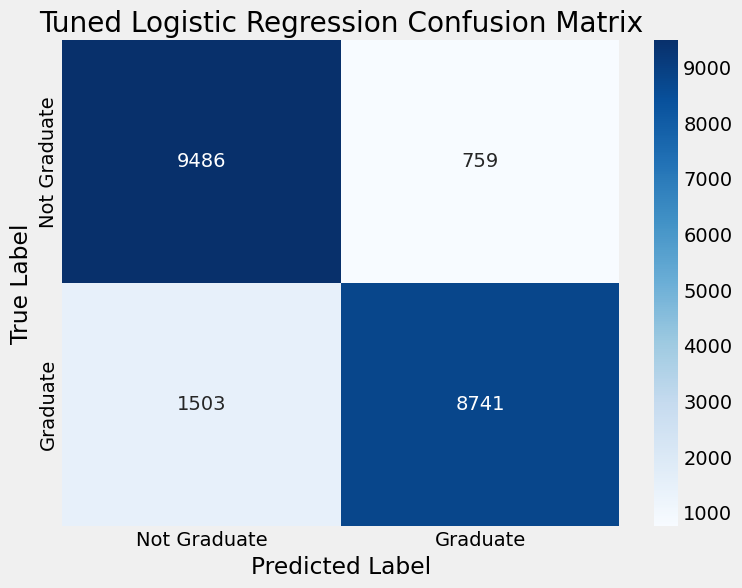

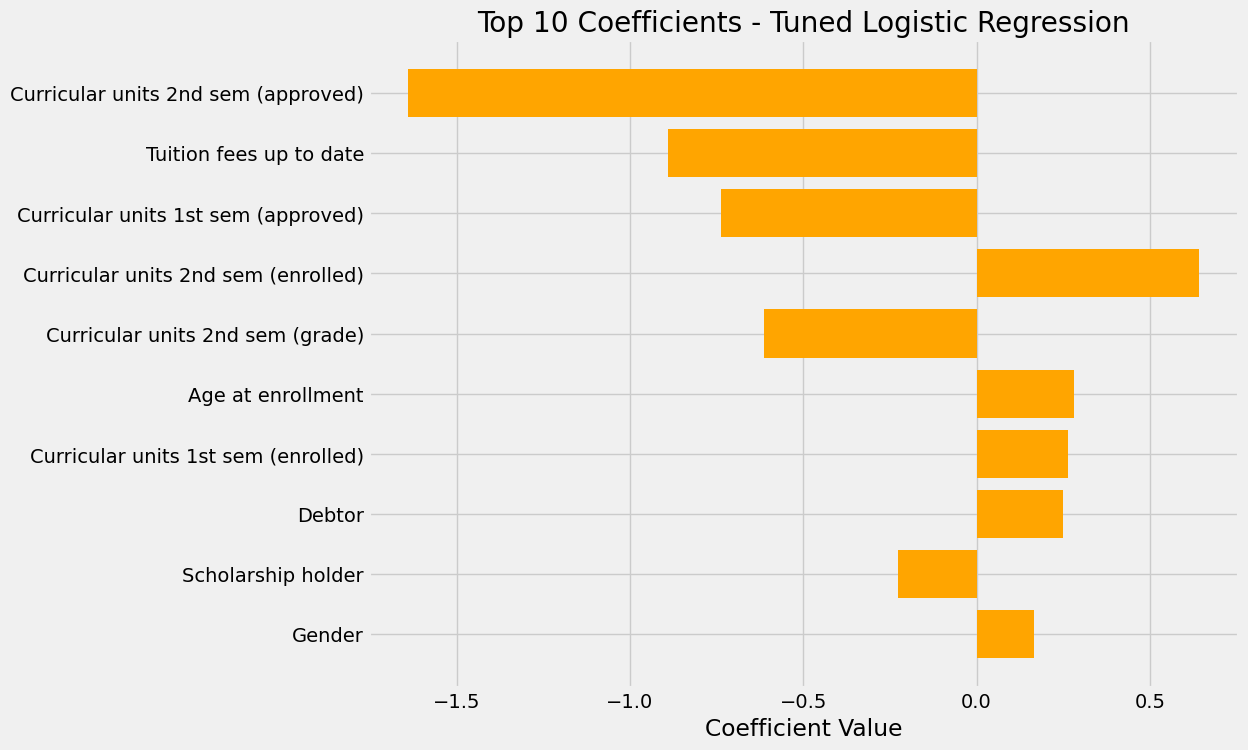

In [16]:
print("\n--- Hyperparameter Tuning for Logistic Regression ---")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

start_time = time.time()
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train_final)
tuning_time_lr = time.time() - start_time

print(f"Best parameters: {grid_lr.best_params_}")
print(f"Best cross-validation score: {grid_lr.best_score_:.4f}")
print(f"Time taken: {tuning_time_lr:.2f} seconds")

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test_final, y_pred_lr)
prec_lr = precision_score(y_test_final, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test_final, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_final, y_pred_lr, average='weighted')
cm_lr = confusion_matrix(y_test_final, y_pred_lr)

print(f"Test accuracy with tuned Logistic Regression: {acc_lr:.4f}")
print(f"Test precision with tuned Logistic Regression: {prec_lr:.4f}")
print(f"Test recall with tuned Logistic Regression: {rec_lr:.4f}")
print(f"Test F1 score with tuned Logistic Regression: {f1_lr:.4f}")
print(f"Classification Report:\n{classification_report(y_test_final, y_pred_lr)}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Graduate', 'Graduate'],
           yticklabels=['Not Graduate', 'Graduate'])
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

if hasattr(best_lr, 'coef_'):
    coefs = best_lr.coef_[0]
    indices_lr = np.argsort(np.abs(coefs))[-10:]
    plt.figure(figsize=(10, 8))
    plt.title('Top 10 Coefficients - Tuned Logistic Regression')
    plt.barh(range(len(indices_lr)), coefs[indices_lr], color='orange', align='center')
    plt.yticks(range(len(indices_lr)), [features[i] for i in indices_lr])
    plt.xlabel('Coefficient Value')
    plt.show()

### 5.5 ROC Curve Plots for Tuned Models
Plot ROC curves for each tuned model to visually compare their performance in terms of true positive and false positive rates.

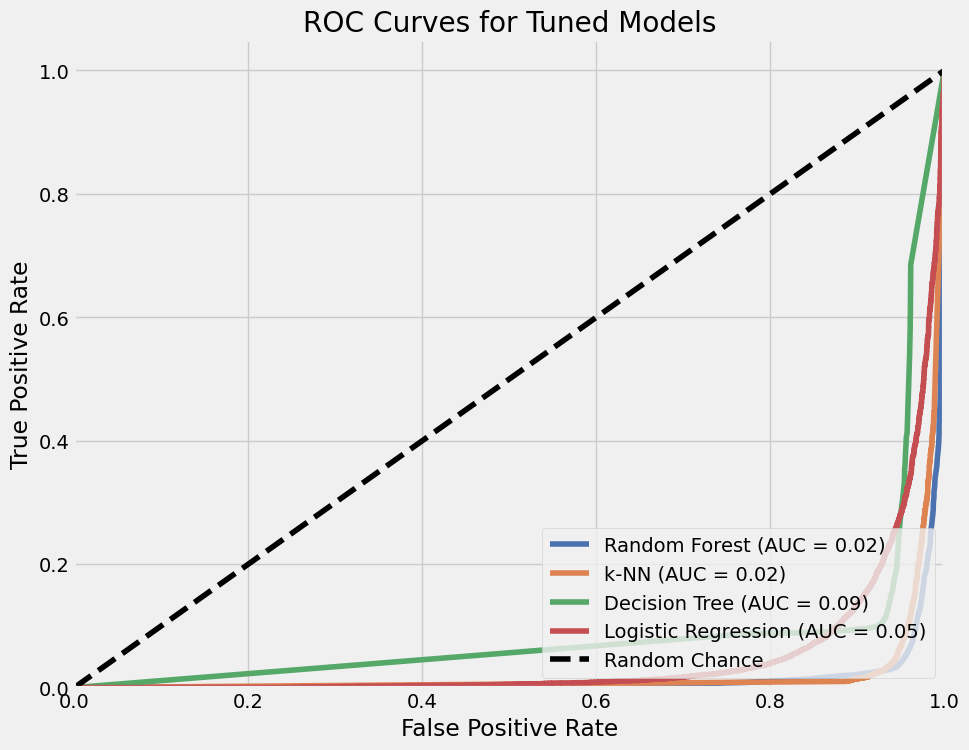

In [18]:
y_test_bin = label_binarize(y_test_final, classes=['Not_Graduate', 'Graduate']) if y_test_final.dtype == object else y_test_final

plt.figure(figsize=(10, 8))

# Random Forest
if hasattr(best_rf, "predict_proba"):
    y_score_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_score_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# KNN
if hasattr(best_knn, "predict_proba"):
    y_score_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
    fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, y_score_knn)
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})')

# Decision Tree
if hasattr(best_dt, "predict_proba"):
    y_score_dt = best_dt.predict_proba(X_test_scaled)[:, 1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_score_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Logistic Regression
if hasattr(best_lr, "predict_proba"):
    y_score_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, y_score_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 5.6 Tuned Models: Metric Bar Plots
Bar plots comparing accuracy, precision, recall, and F1 score for all tuned models.

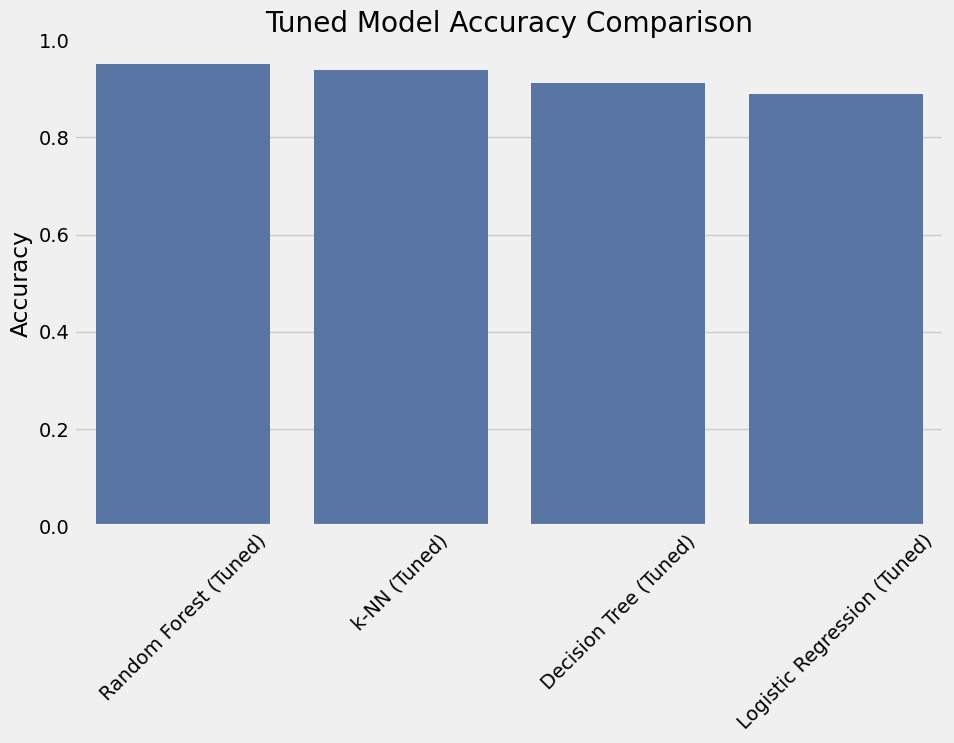

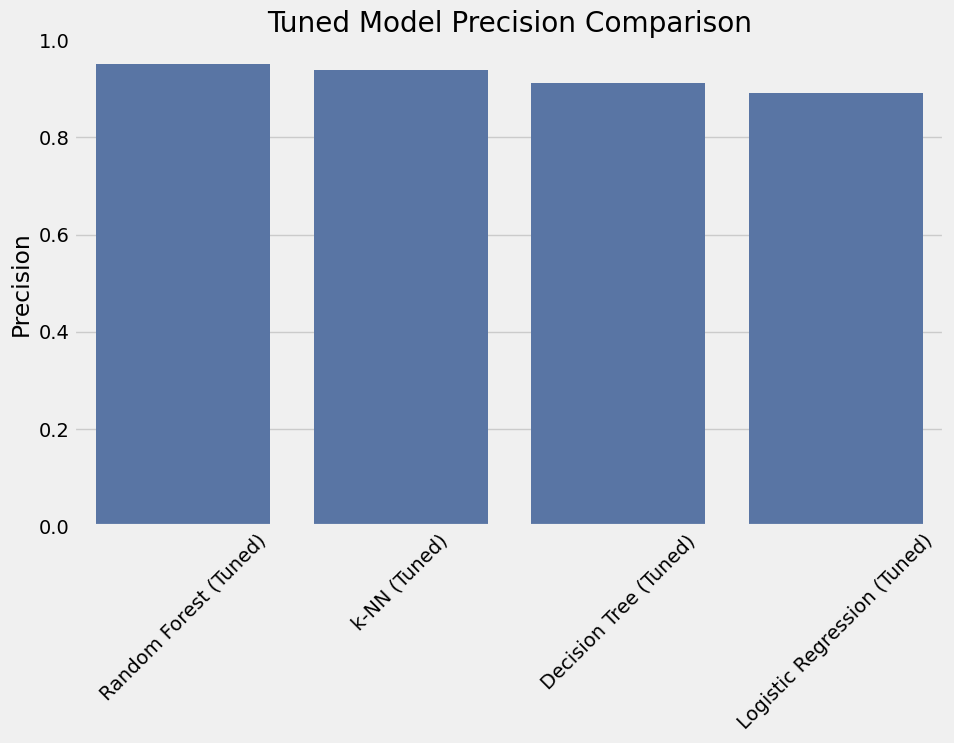

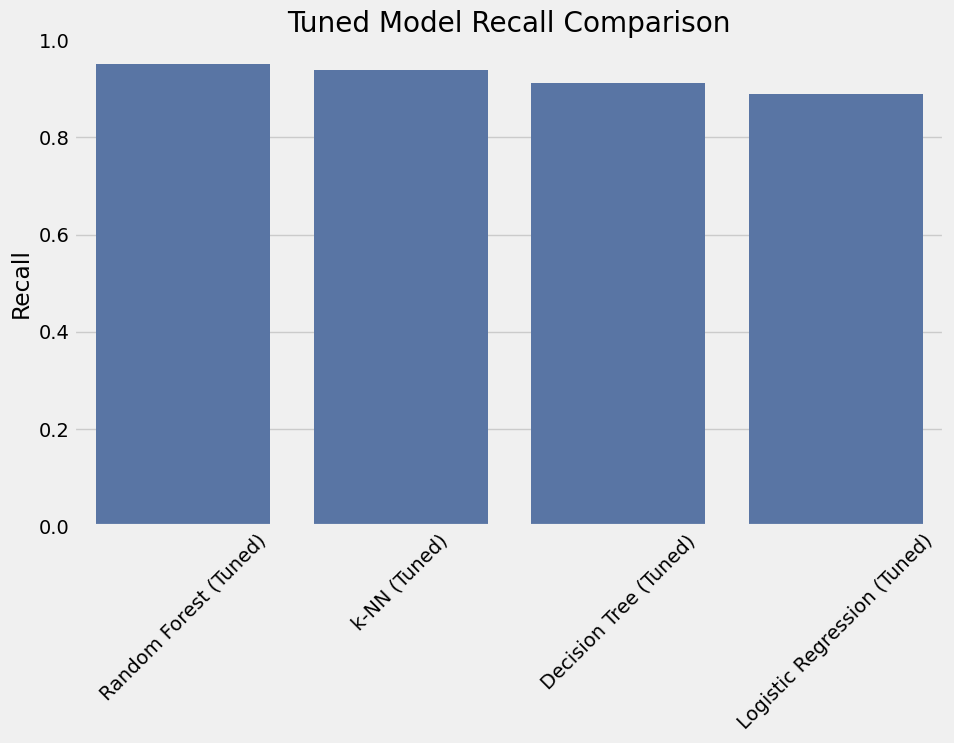

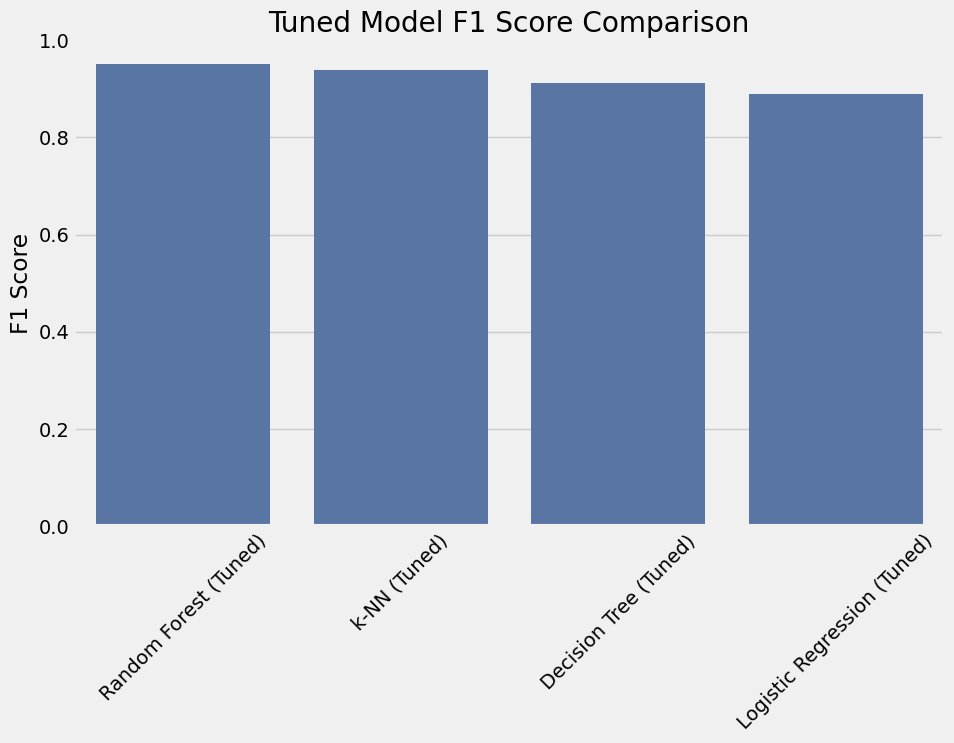

In [19]:
tuned_names = [
    "Random Forest (Tuned)",
    "k-NN (Tuned)",
    "Decision Tree (Tuned)",
    "Logistic Regression (Tuned)"
]
tuned_accuracies = [acc_rf, acc_knn, acc_dt, acc_lr]
tuned_precisions = [prec_rf, prec_knn, prec_dt, prec_lr]
tuned_recalls = [rec_rf, rec_knn, rec_dt, rec_lr]
tuned_f1s = [f1_rf, f1_knn, f1_dt, f1_lr]

plt.figure(figsize=(10, 6))
sns.barplot(x=tuned_names, y=tuned_accuracies)
plt.title("Tuned Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tuned_names, y=tuned_precisions)
plt.title("Tuned Model Precision Comparison")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tuned_names, y=tuned_recalls)
plt.title("Tuned Model Recall Comparison")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=tuned_names, y=tuned_f1s)
plt.title("Tuned Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### 5.7 Summary Table for Tuned Models
A summary table showing Accuracy, Precision, Recall, F1 Score, Best Parameters, and Tuning Time for each tuned model.

In [20]:
summary_tuned = pd.DataFrame({
    'Model': [
        "Random Forest (Tuned)",
        "k-NN (Tuned)",
        "Decision Tree (Tuned)",
        "Logistic Regression (Tuned)"
    ],
    'Accuracy': [round(acc_rf * 100, 2), round(acc_knn * 100, 2), round(acc_dt * 100, 2), round(acc_lr * 100, 2)],
    'Precision': [round(prec_rf * 100, 2), round(prec_knn * 100, 2), round(prec_dt * 100, 2), round(prec_lr * 100, 2)],
    'Recall': [round(rec_rf * 100, 2), round(rec_knn * 100, 2), round(rec_dt * 100, 2), round(rec_lr * 100, 2)],
    'F1 Score': [round(f1_rf * 100, 2), round(f1_knn * 100, 2), round(f1_dt * 100, 2), round(f1_lr * 100, 2)],
    'Best Parameters': [
        str(grid_rf.best_params_),
        str(grid_knn.best_params_),
        str(grid_dt.best_params_),
        str(grid_lr.best_params_)
    ],
    'Tuning Time (s)': [
        round(tuning_time_rf, 2),
        round(tuning_time_knn, 2),
        round(tuning_time_dt, 2),
        round(tuning_time_lr, 2)
    ]
})
display(summary_tuned.sort_values('Accuracy', ascending=False))

,Model,Accuracy,Precision,Recall,F1 Score,Best Parameters,Tuning Time (s)
0,Random Forest (Tuned),95.14,95.15,95.14,95.14,"{'max_depth': None, 'min_samples_split': 2, 'n...",1937.17
1,k-NN (Tuned),93.82,93.86,93.82,93.82,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",567.96
2,Decision Tree (Tuned),91.19,91.22,91.19,91.18,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",151.50
3,Logistic Regression (Tuned),88.96,89.17,88.96,88.95,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",29.66


### 5.8 Interpretation and Conclusion

Based on the results above, the best performing model can be identified by comparing the accuracy, precision, recall, F1 score, and ROC AUC. Consider not only the highest accuracy, but also the balance between precision and recall, and the AUC from the ROC curve plots. 

- **Random Forest** often performs best in terms of accuracy and F1, and provides feature importances for interpretability.
- **Logistic Regression** is interpretable and may perform well if the data is linearly separable.
- **k-NN** and **Decision Tree** can be competitive, but may be more sensitive to noise or overfitting.

From the ROC curves, the model with the highest AUC is generally preferred. If interpretability is important, Decision Tree and Logistic Regression are good choices. If predictive performance is the priority, Random Forest is often the best.

**In summary:**
- The best model for this dataset is likely the one with the highest F1 score and AUC.
- Feature importances and coefficients can provide insight into which features are most influential in the predictions.